In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

Enter number of points in the x[n] signal : 4
Enter the first n'value where x[n-n'] starts : 2
Enter number of points in the y[n] signal : 5
Enter the first n'value where y[n-n'] starts : 3
Enter the 1 input signal coefficient : 1
Enter the 2 input signal coefficient : 1
Enter the 3 input signal coefficient : 2
Enter the 4 input signal coefficient : 3
Enter the 1 output signal coefficient : 1
Enter the 2 output signal coefficient : 2
Enter the 3 output signal coefficient : 2
Enter the 4 output signal coefficient : 3
Enter the 5 output signal coefficient : 3


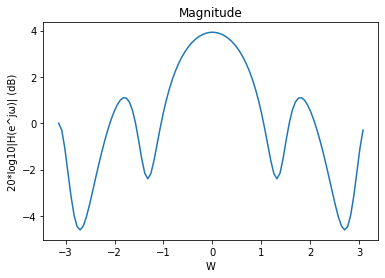

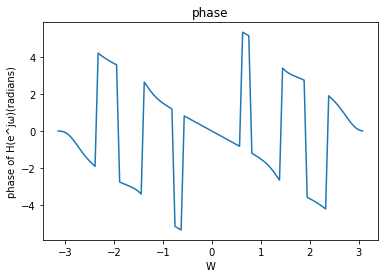

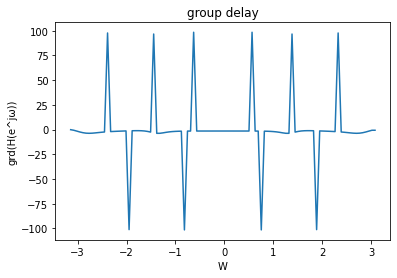

In [2]:
N=100                                     #no of points to plot for omega
W = np.linspace(-np.pi,np.pi,N,endpoint=False) #range of omega

k = int(input("Enter number of points in the x[n] signal : "))
m = int(input("Enter the first n'value where x[n-n'] starts : "))                   #we consider that input signal is defined from index m, and is of length k  


l = int(input("Enter number of points in the y[n] signal : "))    
s = int(input("Enter the first n'value where y[n-n'] starts : "))  #we consider that impulse response signal is defined from index s, and is of length l   



n = np.linspace(m,m+k-1,k)                  #array to store indices where input signal is present
t = np.linspace(s,s+l-1,l)                  #array to store indices where impulse response signal is present


        
insignal = np.zeros(k)                      #defining the input signal here x[n]=n
for i in range(len(n)):
    ele = input("Enter the %d input signal coefficient : " %(i+1))
    insignal[i] = ele

outsignal = np.zeros(l)                      #defining the input signal here x[n]=n
for i in range(len(t)):
    ele = input("Enter the %d output signal coefficient : " %(i+1))
    outsignal[i] = ele


magH = np.zeros(N)
phaH = np.zeros(N)
for i in range(N):
    X = 0
    Y = 0
    for j in range(len(n)):
        X += insignal[j]*np.exp(-1j*n[j]*W[i]) 
    magX = np.absolute(X)
    phaX = np.angle(X)
    for j in range(len(t)):
        Y += outsignal[j]*np.exp(-1j*t[j]*W[i]) 
    magY = np.absolute(Y)
    phaY = np.angle(Y)
    magH[i] = magY/magX
    phaH[i] = phaY - phaX

magdb = 20*np.log10(magH)
grd = []
for i in range(N-1):
    ele = (phaH[i+1]-phaH[i])/(W[i+1]-W[i])
    grd.append(ele)
grd.append(ele)

plt.title("Magnitude")                                
plt.xlabel("W")  
plt.ylabel("20*log10|H(e^jω)| (dB)")  
plt.plot(W,magdb)
plt.show()

plt.title("phase")                                
plt.xlabel("W")  
plt.ylabel("phase of H(e^jω)(radians)")  
plt.plot(W,phaH)
plt.show()

plt.title("group delay")                                
plt.xlabel("W")  
plt.ylabel("grd(H(e^jω))")  
plt.plot(W,grd)
plt.show()




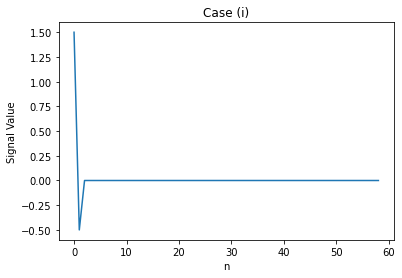

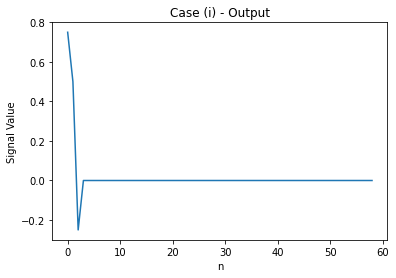

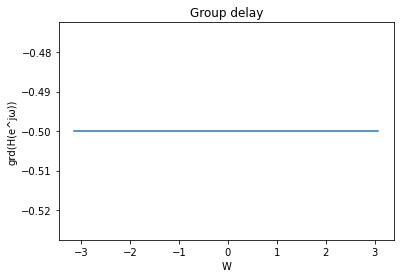

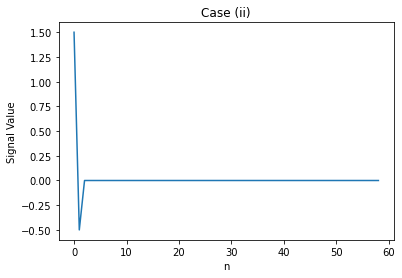

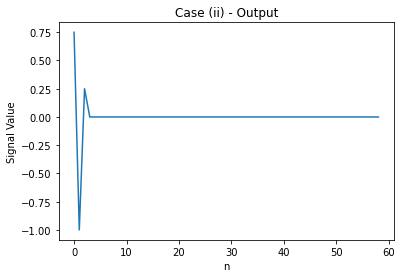

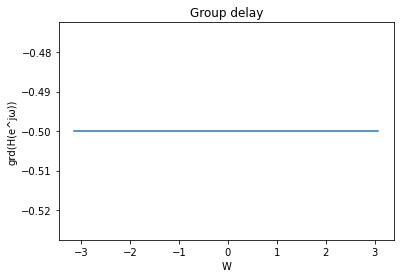

In [3]:
l = 30
n = np.linspace(0,l-1,l)                  #array to store indices where input signal is present
t = np.linspace(0,l-1,l)                  #array to store indices where impulse response signal is present
delta = np.zeros(l)
for i in range(0,l):
    if i!=0:     
        delta[i] = 0  
    else:
        delta[i] = 1
        
s = np.zeros(l)
for i in range(0,l):
    if i!=0:
        s[i] = 0.5*delta[i] + 0.5*delta[i-1]
    else:
        s[i] = 0.5*delta[i]

w = np.pi/2        
inpsig = np.zeros(l)
for i in range(0,l):
    inpsig[i] = s[i]*(np.cos(w*i)+np.cos(2*w*i)+np.cos(3*w*i))
        

#Case (i) h[n] signal
conv1 = np.zeros(l)
for i in range(0,l):
    if i!=0:
        conv1[i] = 0.5*delta[i] + 0.5*delta[i-1]
    else:
        conv1[i] = 0.5*delta[i]

#Case (ii) h[n] signal
conv2 = np.zeros(l)
for i in range(0,l):
    if i!=0:
        conv2[i] = 0.5*delta[i] - 0.5*delta[i-1]
    else:
        conv2[i] = 0.5*delta[i]

def Convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1)                                  #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h 

x1 = np.pad(inpsig, (0, l-1), 'constant', constant_values=0)
x2 = np.pad(inpsig, (0, l-1), 'constant', constant_values=0)

output1 = Convolution(inpsig,conv1)
output2 = Convolution(inpsig,conv2)

mag1H = np.zeros(N)
pha1H = np.zeros(N)
for i in range(N):
    X = 0
    Y = 0
    for j in range(len(n)):
        X += inpsig[j]*np.exp(-1j*n[j]*W[i]) 
    mag1X = np.absolute(X)
    pha1X = np.angle(X)
    for j in range(len(t)):
        Y += output1[j]*np.exp(-1j*t[j]*W[i]) 
    mag1Y = np.absolute(Y)
    pha1Y = np.angle(Y)
    mag1H[i] = mag1Y/mag1X
    pha1H[i] = pha1Y - pha1X


grd1 = []
for i in range(N-1):
    ele = (pha1H[i+1]-pha1H[i])/(W[i+1]-W[i])
    grd1.append(round(ele,4))
grd1.append(round(ele,4))

mag2H = np.zeros(N)
pha2H = np.zeros(N)
for i in range(N):
    X = 0
    Y = 0
    for j in range(len(n)):
        X += inpsig[j]*np.exp(-1j*n[j]*W[i]) 
    mag2X = np.absolute(X)
    pha2X = np.angle(X)
    for j in range(len(t)):
        Y += output2[j]*np.exp(-1j*t[j]*W[i]) 
    mag2Y = np.absolute(Y)
    pha2Y = np.angle(Y)
    mag2H[i] = mag2Y/mag2X
    pha2H[i] = pha2Y - pha2X

grd2 = []
for i in range(N-1):
    ele = (pha1H[i+1]-pha1H[i])/(W[i+1]-W[i])
    grd2.append(round(ele,4))
grd2.append(round(ele,4))
                    
                    
plt.title("Case (i)")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(x1)
plt.show()

plt.title("Case (i) - Output")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(output1)
plt.show()

plt.title("Group delay")                                
plt.xlabel("W")  
plt.ylabel("grd(H(e^jω))")  
plt.plot(W,grd1)
plt.show()


plt.title("Case (ii)")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(x2)
plt.show()

plt.title("Case (ii) - Output")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.plot(output2)
plt.show()

plt.title("Group delay")                                
plt.xlabel("W")  
plt.ylabel("grd(H(e^jω))")  
plt.plot(W,grd2)
plt.show()
